In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
from keras import Sequential
from keras.layers import Dense
ANN = Sequential([
    keras.layers.Flatten (input_shape = (32,32,3)),
    Dense(30,activation = 'relu'),
    Dense(30,activation = 'softmax'),
    Dense(10,activation = 'sigmoid')
])

ANN.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
ANN.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.2016 - loss: 2.1995
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.2701 - loss: 1.9780
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.3002 - loss: 1.9130
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.3121 - loss: 1.8774
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.3328 - loss: 1.8342
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.3581 - loss: 1.7969
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.3729 - loss: 1.7635
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.3763 - loss: 1.7460
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.3819 - loss: 1.7305
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.3860 - loss: 1.7138


In [6]:
y_pred = ANN.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step


In [7]:
y_pred[28].argmax()
classes = [' airplanes',' cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
# print("Actual Class :", classes[y_test[25]])
classes[y_pred[28].argmax()]

' cars'

In [8]:
# CNN Implementation
from keras import Sequential
CNN = Sequential([
    layers.Conv2D(filters = 30 , kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])
CNN.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
CNN.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3830 - loss: 1.6839
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5961 - loss: 1.1523
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6477 - loss: 1.0021
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6864 - loss: 0.8945
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7142 - loss: 0.8197


In [10]:
y_pred = CNN.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


predicted Class : ships
Actual Class: ships


/var/folders/5y/z1t4k2595sl63sn36j4bfvcr0000gn/T/ipykernel_55904/2721047738.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Actual Class: " + classes[int(y_test[15])])


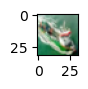

In [11]:
print("predicted Class : " + classes[y_pred[15].argmax()])
print("Actual Class: " + classes[int(y_test[15])])
plt.figure(figsize = (0.53,0.53))
plt.imshow(X_test[15])